<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/NASA_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avishkarandima","key":"ab5f6b19686b060b3ea485bc78dc80a5"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vinayak123tyagi/bearing-dataset

 99% 1.55G/1.56G [00:16<00:00, 164MB/s]
100% 1.56G/1.56G [00:16<00:00, 102MB/s]


In [5]:
from zipfile import ZipFile
file_name = "bearing-dataset.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [6]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os


In [7]:
import matplotlib.pyplot as plt


In [ ]:
#We will calculate following time domain features.

# Maximum value
# Minimum value
# Mean value
# Standard deviation (Unbiased std)
# Root mean square value (RMS)
# Skewness - lack of symmetry
# Kurtosis - the sharpness of the peak
# Crest factor =  Max/RMS 
# Form factor =  RMS/Mean

In [8]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [9]:
def compute_kurtosis(x):  
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [10]:
Time_feature_matrix=pd.DataFrame()

In [11]:
test_set=2
bearing_no=1
path='2nd_test/2nd_test'

In [12]:
for filename in os.listdir(path):
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
   
    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], axis=0)

print(Time_feature_matrix)

                      0      1         2         3         4         5  \
2004.02.15.14.12  0.403 -0.378 -0.001087  0.079091  0.079097 -0.001619   
2004.02.14.06.12  0.361 -0.422 -0.001809  0.077228  0.077247 -0.002774   
2004.02.17.23.02  0.513 -0.535 -0.001967  0.105445  0.105460 -0.004060   
2004.02.19.04.52  2.073 -3.120 -0.002442  0.447677  0.447673 -0.468621   
2004.02.13.00.12  0.457 -0.447 -0.002272  0.077307  0.077339 -0.026194   
...                 ...    ...       ...       ...       ...       ...   
2004.02.17.06.02  0.505 -0.503 -0.001560  0.108237  0.108246 -0.059170   
2004.02.14.01.32  0.415 -0.322 -0.001860  0.076445  0.076466  0.002854   
2004.02.15.09.32  0.415 -0.366 -0.002038  0.077021  0.077046 -0.002340   
2004.02.15.03.22  0.415 -0.432 -0.001796  0.077976  0.077995  0.010981   
2004.02.13.03.22  0.369 -0.381 -0.002490  0.076555  0.076594 -0.061155   

                         6         7           8  
2004.02.15.14.12  0.584428  5.095033  -72.739081  
2004.02.1

In [16]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

# **Pure Data**

In [17]:
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [18]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

## **Noisy Data**

In [19]:
noisy_df = gaussian_noise(Time_feature_matrix, mu,std)

In [20]:
noisy_df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.453959,-0.324298,0.064978,-0.024580,0.098983,0.148353,0.622144,6.297183,-7.265929
2004-02-12 10:42:00,0.368678,-0.376879,0.091905,0.198240,-0.019655,-0.090643,0.605512,4.938911,-29.112447
2004-02-12 10:52:00,0.618296,-0.466939,0.203567,0.182422,0.141401,0.207286,0.534947,6.339043,-30.670375
2004-02-12 11:02:00,0.773539,-0.677222,-0.054009,-0.014464,-0.131138,0.114361,1.411651,7.844092,-34.630412
2004-02-12 11:12:00,0.366665,-0.384226,0.304595,0.143257,0.102177,-0.083922,0.724177,5.040214,-32.556035
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,5.016527,-5.005721,0.092357,0.738420,0.824702,-0.541991,12.595717,6.941118,-263.449316
2004-02-19 05:52:00,2.631846,-3.031639,-0.014980,0.403356,0.319859,-0.428346,3.630630,5.913581,-102.975061
2004-02-19 06:02:00,3.491309,-3.754071,-0.057752,0.538541,0.383807,-0.395219,4.849705,7.114140,-284.204492
2004-02-19 06:12:00,0.071466,-0.142712,0.087343,-0.082896,-0.125805,0.679494,3.377292,2.392322,1.151069


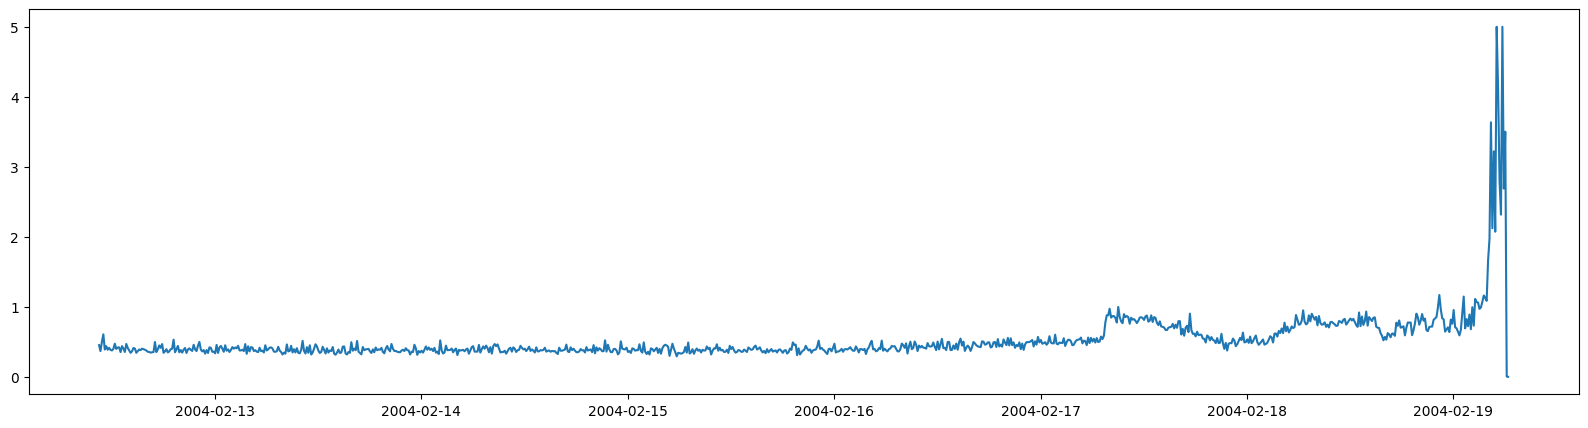

In [21]:
plt.figure(figsize=(20,5)) 
plt.plot(Time_feature_matrix.index,Time_feature_matrix['Max'])
plt.show()


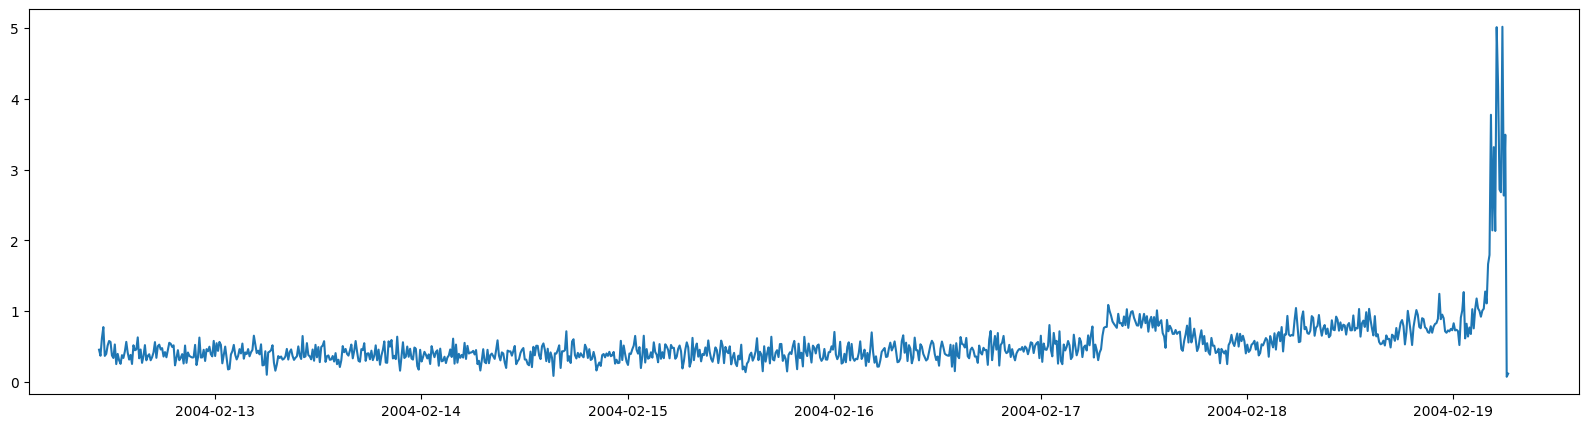

In [22]:
plt.figure(figsize=(20,5)) 
plt.plot(noisy_df.index,noisy_df['Max'])
plt.show()

In [23]:
# 1- pure
#0 - noisy

Time_feature_matrix = Time_feature_matrix.assign(target=1)

In [24]:
Time_feature_matrix.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1


In [25]:
Time_feature_matrix.dtypes

Max             float64
Min             float64
Mean            float64
Std             float64
RMS             float64
Skewness        float64
Kurtosis        float64
Crest Factor    float64
Form Factor     float64
target            int64
dtype: object

In [26]:
#Time_feature_matrix=Time_feature_matrix.reset_index()

In [27]:
noisy_df = noisy_df.assign(target=0)

In [28]:
noisy_df.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target
2004-02-12 10:32:00,0.453959,-0.324298,0.064978,-0.024580,0.098983,0.148353,0.622144,6.297183,-7.265929,0
2004-02-12 10:42:00,0.368678,-0.376879,0.091905,0.198240,-0.019655,-0.090643,0.605512,4.938911,-29.112447,0
2004-02-12 10:52:00,0.618296,-0.466939,0.203567,0.182422,0.141401,0.207286,0.534947,6.339043,-30.670375,0
2004-02-12 11:02:00,0.773539,-0.677222,-0.054009,-0.014464,-0.131138,0.114361,1.411651,7.844092,-34.630412,0
2004-02-12 11:12:00,0.366665,-0.384226,0.304595,0.143257,0.102177,-0.083922,0.724177,5.040214,-32.556035,0


In [29]:
#noisy_df=noisy_df.reset_index()

In [87]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([Time_feature_matrix,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target
0,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1
1,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1
2,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1
3,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1
4,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1
5,0.439,-0.366,-0.001623,0.078300,0.078315,0.026851,0.455756,5.605593,-48.250169,1


In [73]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Mixed_set, Mixed_set.loc[:,'target'], test_size=0.33, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


          Max       Min      Mean       Std       RMS  Skewness  Kurtosis  \
0    0.747000 -0.811000 -0.001600  0.171373  0.171377 -0.089376  1.970094   
1    0.420409 -0.388711 -0.111123  0.210938  0.043120  0.233840  0.698328   
2    0.352000 -0.461000 -0.002426  0.077344  0.077380 -0.010552  0.483982   
3    0.432336 -0.498906 -0.068111 -0.063956  0.076194 -0.018542  0.502540   
4    0.781000 -0.776000 -0.001876  0.160479  0.160486 -0.103801  1.984903   
..        ...       ...       ...       ...       ...       ...       ...   
645  0.480469 -0.563196 -0.033813  0.003026  0.088275 -0.172511  1.940791   
646  0.374000 -0.332000 -0.001532  0.078864  0.078877  0.005548  0.316867   
647  0.352000 -0.408000 -0.002173  0.075481  0.075511 -0.002449  0.481192   
648  0.302747 -0.378533  0.102266  0.011902  0.011406 -0.017918  0.496889   
649  0.417000 -0.310000 -0.001902  0.076033  0.076055  0.059184  0.417502   

     Crest Factor  Form Factor  target  
0        4.358824  -107.129935    

In [61]:
def generateFrames(data_set,size = 6,overlap = True):
  # generate overlapping frames
  list_of_dfs = [data_set.loc[i:i+size-1,:] for i in range(0, len(data_set), 1 if overlap else size) if i < len(data_set) - size]
 
  data = []
  labels = []
  for d in list_of_dfs:
    if(len(d)==size):
      values = d[['RMS']].values.flatten()
      min_val = tf.reduce_min(values)
      max_val = tf.reduce_max(values)
      values = (values - min_val) / (max_val - min_val)
      data.append(values)

      labels.append(d['target'].sum() < 4)

  labels = np.asarray(labels, dtype=bool) 
  data = np.array(data)

  return (data,labels)

In [74]:
train_data,train_labels = generateFrames(X_train,12)
test_data,test_labels = generateFrames(X_test,12)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='softmax'),
    tf.keras.layers.Dense(6, activation='softmax'),
    tf.keras.layers.Dense(3, activation='softmax'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data,train_labels, epochs=10)

Epoch 1/10
41/41 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.9250
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.9250
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.9250
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.9250
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.9250
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.9250
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.9250
Epoch 8/10
41/41 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.9250
Epoch 9/10
41/41 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.9250
Epoch 10/10
41/41 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.9250


In [76]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

20/20 - 0s - loss: 0.3457 - accuracy: 0.9436 - 221ms/epoch - 11ms/step


In [97]:
def plotUsingAutoEncoder(model):
  size = 12
  list_of_dfs = [Mixed_set.loc[i:i+size-1,:] for i in range(0,len(Mixed_set),12)if i<len(Mixed_set)-12]

  denoised = []

  for d in list_of_dfs:
    if(len(d)== size):
      values = d[['RMS']].values.flatten()
      min_val = tf.reduce_min(values)
      max_val = tf.reduce_max(values)
      values = (values - min_val) / (max_val - min_val)
      encoded_data = model.encoder( np.array([values])).numpy()
      [values] = model.decoder(encoded_data).numpy()
      values = (np.array(values) * (max_val - min_val).numpy())   + min_val.numpy()
      denoised = np.concatenate((np.array(denoised) , np.array(values)))

  denoised = np.array(denoised)
  noise = Mixed_set[['RMS']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(denoised, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()


In [92]:
class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(12, activation = 'softmax'),
        tf.keras.layers.Dense(6, activation = 'softmax'),
        tf.keras.layers.Dense(3, activation = 'softmax'),
        tf.keras.layers.Dense(1),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(24, activation="relu"),
      tf.keras.layers.Dense(12, activation="relu"),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(3, activation="relu")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(12, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
discriminator.fit(train_data, train_labels, epochs=10)

Epoch 1/10
41/41 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.9250
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.9250
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.9250
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.9250
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.9250
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.9250
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.9250
Epoch 8/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.9250
Epoch 9/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3220 - accuracy: 0.9250
Epoch 10/10
41/41 [==============================] - 0s 8ms/step - loss: 0.3126 - accuracy: 0.9250


In [ ]:
max_epochs = 2
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE


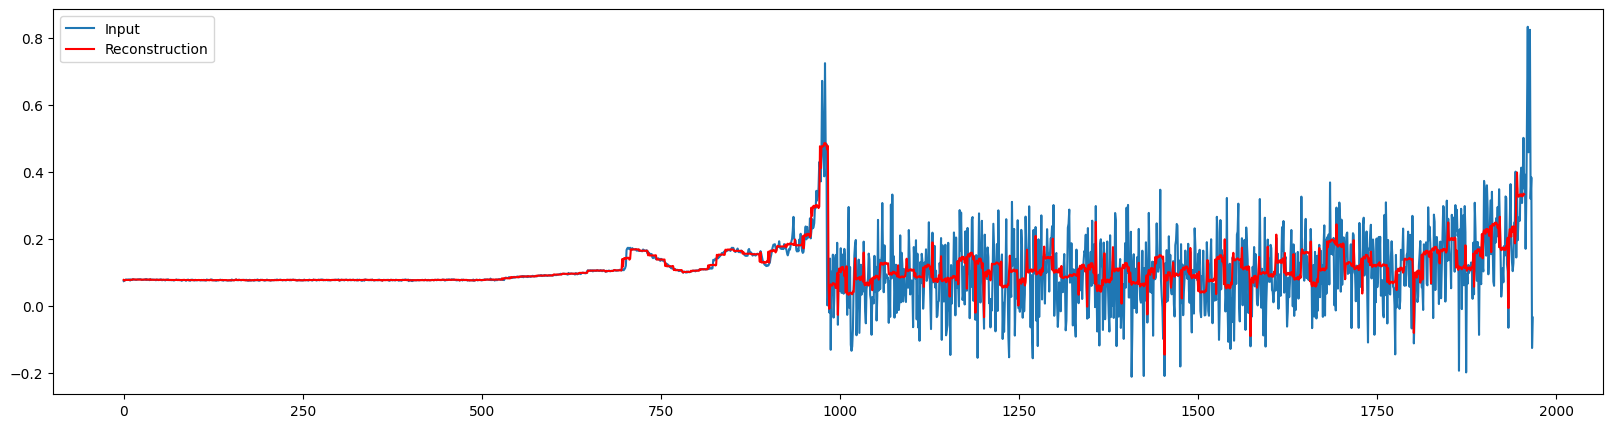

Epoch 1 Starting
Epoch 1 DONE


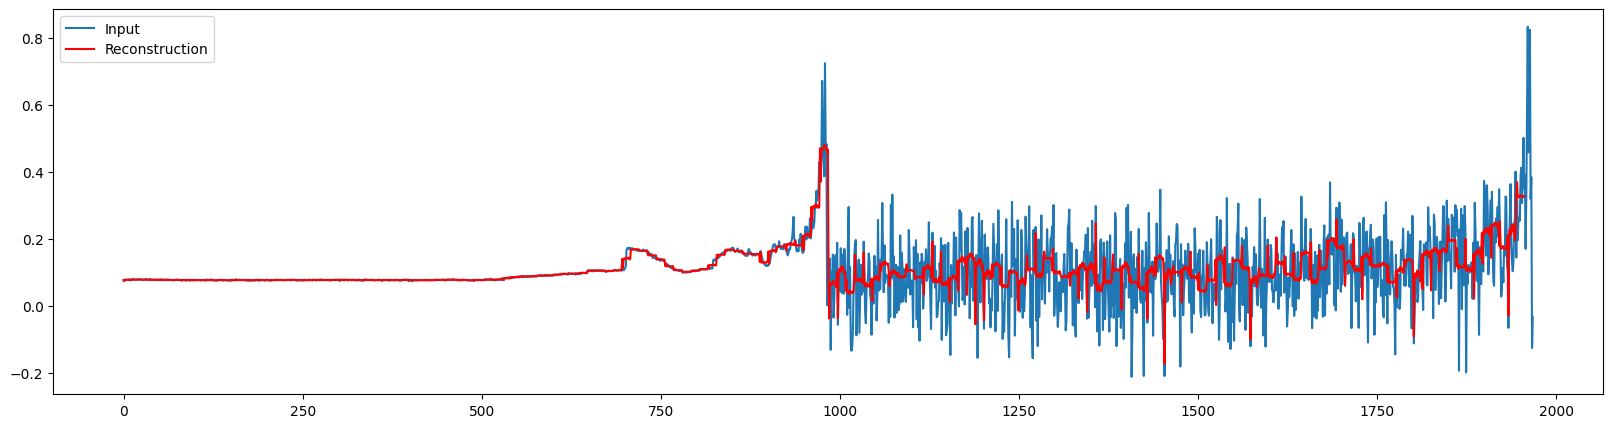

Epoch 2 Starting
Epoch 2 DONE


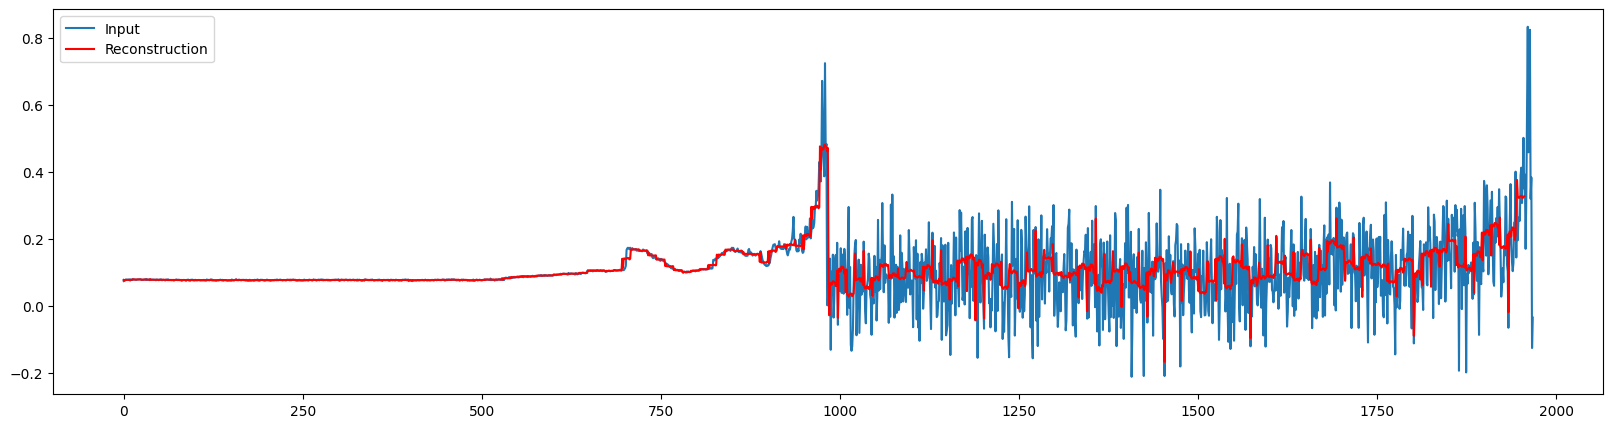

Epoch 3 Starting
Epoch 3 DONE


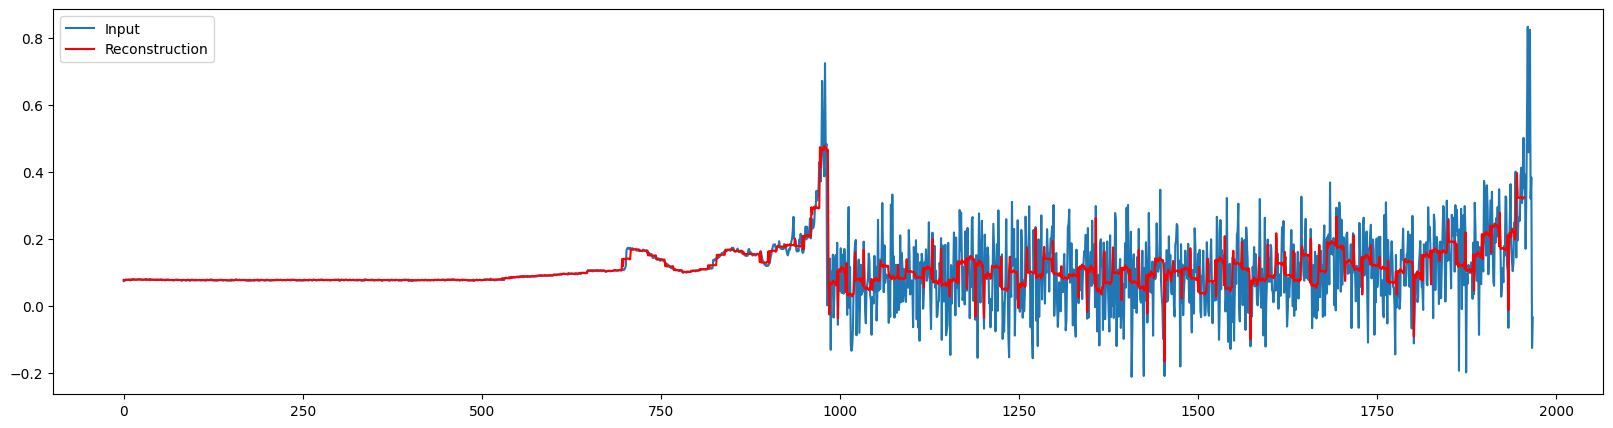

Epoch 4 Starting


In [ ]:
step = 0
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for frame in train_data:
    #print(frame)
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([frame]))
      disc_output = discriminator(np.array(output))

      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(frame, output[0]) * -disc_output[0][0]

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))

  
  print("Epoch " + str(epoch) +" DONE")
  plotUsingAutoEncoder(generator)